In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor, RandomAffine, RandomHorizontalFlip

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform_augmented = transforms.Compose([transforms.Resize(64),
    transforms.CenterCrop(224),
    transforms.ToTensor()])
train_dataset= datasets.CIFAR10(root='data', train=True,
                                download=True,
                                transform=transform_augmented)
test_dataset = datasets.CIFAR10(root='data',
                             train=False,
                             download=True,
                             transform=transform_augmented)

#DataAugmentation


100%|██████████| 170498071/170498071 [00:08<00:00, 20379300.51it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [4]:
class_names=train_dataset.classes
train_dataset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [5]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [6]:
len(train_dataset)
image,label = train_dataset[0]


In [7]:
image.shape,label
#    train_dataset is a dataset object that contains both the images and labels.
# train_dataset.data is a tensor containing only the image data without labels.

(torch.Size([3, 224, 224]), 6)

In [8]:
len(test_dataset)
image,label =test_dataset[0]
image.shape,label

(torch.Size([3, 224, 224]), 3)

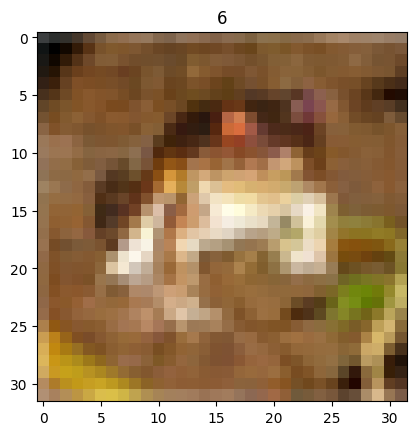

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('%i' % train_dataset.targets[0])
plt.show()

In [10]:
from torch.utils.data import DataLoader
#deciding batch size
batch_size=64

train_dataloader= DataLoader(dataset=train_dataset,
                             batch_size=int(batch_size),
                             shuffle=True)

test_dataloader= DataLoader(dataset=test_dataset,
                            batch_size=int(batch_size),
                            shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b3b7dbd79d0>, <torch.utils.data.dataloader.DataLoader object at 0x7b3b7dbd7a30>)
Length of train dataloader: 782 batches of 64
Length of test dataloader: 157 batches of 64


In [11]:
train_image , train_labels = next(iter(train_dataloader))
train_image.shape,train_labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [12]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 135MB/s]


In [13]:
image.shape

torch.Size([3, 224, 224])

In [14]:
len(train_dataloader)
print(len(train_dataloader))

782


Epoch [1/4], Step [64/782], Loss: 1.6098
Epoch [1/4], Step [128/782], Loss: 1.3889
Epoch [1/4], Step [192/782], Loss: 0.9982
Epoch [1/4], Step [256/782], Loss: 0.8461
Epoch [1/4], Step [320/782], Loss: 0.9027
Epoch [1/4], Step [384/782], Loss: 1.1606
Epoch [1/4], Step [448/782], Loss: 0.9883
Epoch [1/4], Step [512/782], Loss: 0.7274
Epoch [1/4], Step [576/782], Loss: 0.8164
Epoch [1/4], Step [640/782], Loss: 0.9483
Epoch [1/4], Step [704/782], Loss: 0.7572
Epoch [1/4], Step [768/782], Loss: 0.7978
Epoch [2/4], Step [64/782], Loss: 0.8415
Epoch [2/4], Step [128/782], Loss: 0.7102
Epoch [2/4], Step [192/782], Loss: 0.8418
Epoch [2/4], Step [256/782], Loss: 0.6420
Epoch [2/4], Step [320/782], Loss: 1.0175
Epoch [2/4], Step [384/782], Loss: 0.6161
Epoch [2/4], Step [448/782], Loss: 0.6490
Epoch [2/4], Step [512/782], Loss: 0.6954
Epoch [2/4], Step [576/782], Loss: 0.6587
Epoch [2/4], Step [640/782], Loss: 0.6553
Epoch [2/4], Step [704/782], Loss: 0.7501
Epoch [2/4], Step [768/782], Loss: 0

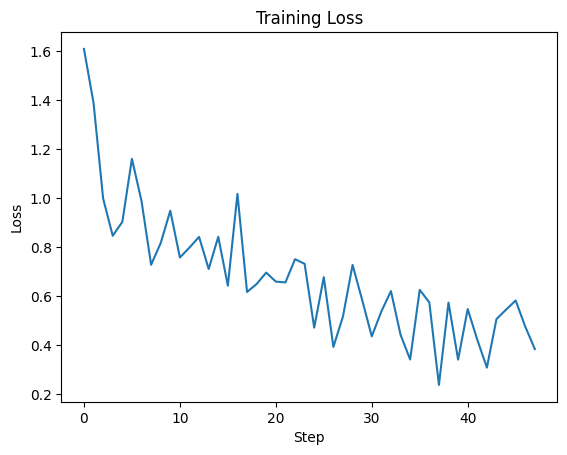

In [15]:
def train(model, train_dataloader, num_epochs, lr, checkpoint_path='model_checkpoint.pth'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    loss_values = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = loss_func(output, labels)
            loss.backward()
            optimizer.step()

            if (i+1) % batch_size == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, len(train_dataloader), loss.item()))

                loss_values.append(loss.item())

        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss_values': loss_values,
        }
        torch.save(checkpoint, checkpoint_path)

    plt.plot(loss_values)
    plt.title('Training Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.show()


train(alexnet, train_dataloader, num_epochs=4, lr=0.0001, checkpoint_path='model_checkpoint.pth')

In [16]:
!nvidia-smi
# if connected to gpu

Thu Oct  3 16:33:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              32W /  70W |   1595MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [17]:

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Test Accuracy of the model on the test dataset: 80.18%

Classification Report:
{'0': {'precision': 0.8115942028985508, 'recall': 0.84, 'f1-score': 0.8255528255528255, 'support': 1000.0}, '1': {'precision': 0.8646329837940896, 'recall': 0.907, 'f1-score': 0.8853099072718399, 'support': 1000.0}, '2': {'precision': 0.6750814332247557, 'recall': 0.829, 'f1-score': 0.744165170556553, 'support': 1000.0}, '3': {'precision': 0.7079530638852672, 'recall': 0.543, 'f1-score': 0.6146010186757216, 'support': 1000.0}, '4': {'precision': 0.7770961145194274, 'recall': 0.76, 'f1-score': 0.7684529828109201, 'support': 1000.0}, '5': {'precision': 0.7023696682464455, 'recall': 0.741, 'f1-score': 0.7211678832116788, 'support': 1000.0}, '6': {'precision': 0.8743509865005192, 'recall': 0.842, 'f1-score': 0.8578706062149771, 'support': 1000.0}, '7': {'precision': 0.83681592039801, 'recall': 0.841, 'f1-score': 0.8389027431421446, 'support': 1000.0}, '8': {'precision': 0.9148029818956337, 'recall': 0.859, 'f1-s

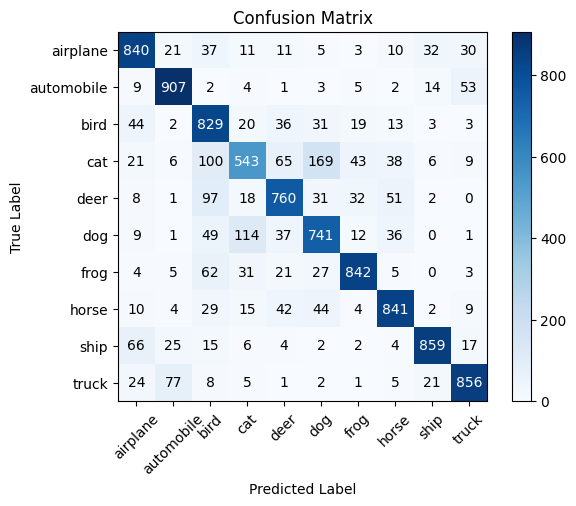

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def test(model, test_dataloader):
    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        all_preds = torch.tensor([], dtype=torch.long, device=device)
        all_labels = torch.tensor([], dtype=torch.long, device=device)

        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)

            test_output = model(images)
            _, pred_y = torch.max(test_output, 1)

            total += labels.size(0)
            correct += (pred_y == labels).sum().item()

            # Store predicted labels and true labels
            all_preds = torch.cat((all_preds, pred_y), dim=0)
            all_labels = torch.cat((all_labels, labels), dim=0)

        accuracy = correct * 100 / total
        print('Test Accuracy of the model on the test dataset: {:.2f}%'.format(accuracy))

        # Calculate precision, recall, sensitivity, specificity, F1 score
        print('\nClassification Report:')
        overall_metrics = classification_report(all_labels.cpu().numpy(), all_preds.cpu().numpy(), output_dict=True)
        print(overall_metrics)
                # Extract overall precision, recall, and F1-score
        macro_precision = overall_metrics['macro avg']['precision']
        macro_recall = overall_metrics['macro avg']['recall']
        macro_f1 = overall_metrics['macro avg']['f1-score']

        print('Overall Metrics:')
        print('Macro-Averaged Precision: {:.4f}'.format(macro_precision))
        print('Macro-Averaged Recall: {:.4f}'.format(macro_recall))
        print('Macro-Averaged F1-Score: {:.4f}'.format(macro_f1))

        # Confusion matrix
        print('\nConfusion Matrix:')
        cm=confusion_matrix(all_labels.cpu().numpy(), all_preds.cpu().numpy())
        plot_confusion_matrix(cm, classes=class_names)


test(alexnet,test_dataloader)